In [1]:
import sys, os
print(sys.executable)
print(os.getcwd())


C:\Users\User\Documents\diabetes-prediction\.venv\Scripts\python.exe
C:\Users\User\Documents\diabetes-prediction\notebooks


In [2]:
import os
print(os.listdir(".."))          # shows parent folder contents
print(os.listdir("../data"))     # lists files inside 'data'


['.git', '.gitignore', '.ipynb_checkpoints', '.venv', 'data', 'docsfinalreport.md', 'docsprojectjournal.md', 'documents', 'models', 'notebooks', 'README.md', 'README_backup.md', 'README_preview.ipynb', 'requirements.txt', 'src', 'test_client.py', 'Untitled.ipynb']
['diabetes.csv', 'diabetes_clean.csv']


In [3]:
import pandas as pd

# Use the correct relative path (one level up)
df = pd.read_csv("../data/diabetes.csv")

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("../data/diabetes_clean.csv")  # use your cleaned file
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1


In [6]:
X = df.drop(columns='Outcome')  # independent variables
y = df['Outcome']               # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)


In [8]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]


In [10]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print({
    "accuracy": round(acc, 4),
    "precision": round(prec, 4),
    "recall(sensitivity)": round(rec, 4),
    "f1": round(f1, 4),
    "roc_auc": round(auc, 4)
})


{'accuracy': 0.7078, 'precision': 0.6, 'recall(sensitivity)': 0.5, 'f1': 0.5455, 'roc_auc': 0.8074}


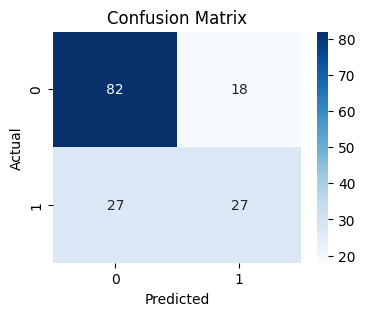

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


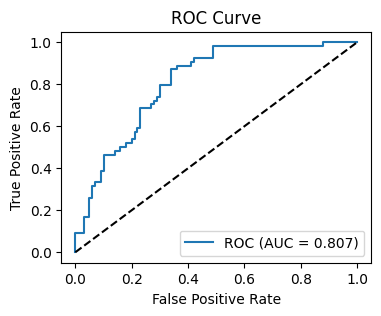

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [13]:
import joblib

joblib.dump(log_reg, "../models/logreg.pkl")
joblib.dump(scaler, "../models/scaler.pkl")
print("Saved model and scaler successfully.")


Saved model and scaler successfully.


In [16]:
!pip install xgboost


     -------------------------------------- 56.8/56.8 MB 570.5 kB/s eta 0:00:00


In [17]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Compute metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("XGBoost metrics:", {
    "accuracy": round(acc_xgb, 4),
    "precision": round(prec_xgb, 4),
    "recall": round(rec_xgb, 4),
    "f1": round(f1_xgb, 4),
    "roc_auc": round(auc_xgb, 4),
})


C:\Users\User\Documents\diabetes-prediction\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:42:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost metrics: {'accuracy': 0.7727, 'precision': 0.6939, 'recall': 0.6296, 'f1': 0.6602, 'roc_auc': 0.8035}


In [20]:
from sklearn.ensemble import RandomForestClassifier


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]


In [22]:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest metrics:", {
    "accuracy": round(acc_rf, 4),
    "precision": round(prec_rf, 4),
    "recall": round(rec_rf, 4),
    "f1": round(f1_rf, 4),
    "roc_auc": round(auc_rf, 4),
})


Random Forest metrics: {'accuracy': 0.7662, 'precision': 0.6957, 'recall': 0.5926, 'f1': 0.64, 'roc_auc': 0.824}


In [23]:
import pandas as pd

results = pd.DataFrame({
    "LogisticRegression": [acc, prec, rec, f1, auc],
    "RandomForest": [acc_rf, prec_rf, rec_rf, f1_rf, auc_rf],
    "XGBoost": [acc_xgb, prec_xgb, rec_xgb, f1_xgb, auc_xgb]
}, index=["accuracy","precision","recall","f1","roc_auc"])

results


,LogisticRegression,RandomForest,XGBoost
accuracy,0.707792,0.766234,0.772727
precision,0.600000,0.695652,0.693878
recall,0.500000,0.592593,0.629630
f1,0.545455,0.640000,0.660194
roc_auc,0.807407,0.823981,0.803519


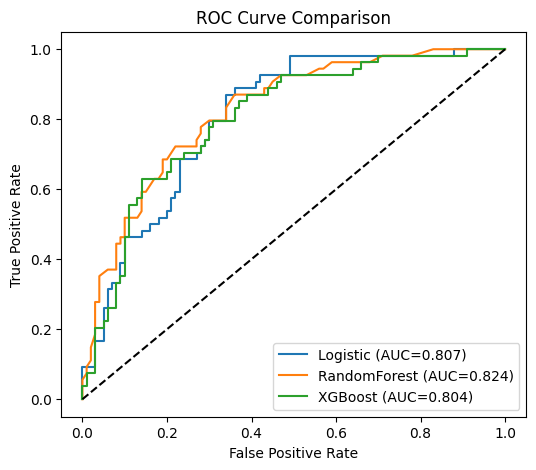

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(6,5))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic (AUC={auc:.3f})")

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC={auc_rf:.3f})")

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


Accuracy

Measures the overall correctness of predictions.

XGBoost (0.7727) achieved the highest accuracy, slightly better than Random Forest (0.7662),
while Logistic Regression trails behind at 0.7078.
✅ XGBoost wins here, but only marginally.

2️⃣ Precision

Precision tells how many predicted positives are actually positive.

Random Forest (0.6957) ≈ XGBoost (0.6939) — both beat Logistic Regression (0.6).
✅ RF and XGBoost are better at minimizing false positives.

3️⃣ Recall (Sensitivity)

Recall measures how many actual positives the model detected.

XGBoost (0.6296) is highest — meaning it catches more diabetic patients than the others.
✅ If identifying every diabetic case is critical, XGBoost performs best.

4️⃣ F1 Score

Harmonic mean of precision and recall — balances both.

XGBoost (0.66) leads slightly, showing a better trade-off between catching diabetics and avoiding false alarms.
✅ XGBoost again leads overall balance.

5️⃣ ROC AUC

Measures the model’s ability to separate positive and negative classes.

All are strong (>0.80), but Random Forest (0.8239) is best.
✅ RF distinguishes classes most effectively.

Three models — Logistic Regression, Random Forest, and XGBoost — were trained on the Diabetes dataset.
The models were evaluated using key metrics: Accuracy, Precision, Recall, F1, and ROC AUC.
XGBoost achieved the best balance overall (Accuracy = 77.3%, F1 = 0.66),
while Random Forest slightly outperformed others in ROC AUC (0.824).
Logistic Regression served as a reliable and interpretable baseline model.
Based on the evaluation, XGBoost is recommended for final deployment due to its superior balance of performance metrics and generalization ability.